In [1]:
import numpy as np
np.__version__


'1.16.4'

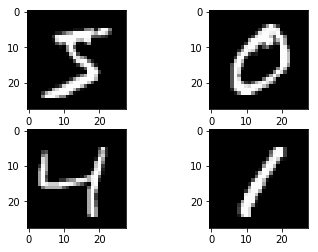

In [3]:
# importing the mnist model
from keras.datasets import mnist
import numpy as np
# showing some images
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0],cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap = plt.get_cmap ('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap = plt.get_cmap('gray'))
plt.show()


    

In [4]:
print(X_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of **60,000** samples of training data, **10,000** samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are **28 x 28**, with **no color channels** (i.e. they are grayscale, so no BGR channels)

In [5]:
import numpy as np
print("initial shape or  number of dimensions in X_train:" + str(X_train.shape))
print('number of samples in X_train :' + str(len(X_train)))
print('number of labels in y_train :' + str(len(y_train)))
print('number of samples in X_test :' + str(len(X_test)))
print('number of labels in y_test :' + str(len(y_test)))

initial shape or  number of dimensions in X_train:(60000, 28, 28)
number of samples in X_train :60000
number of labels in y_train :60000
number of samples in X_test :10000
number of labels in y_test :10000


In [6]:
# it takes only first image
print("dimension of X_train :" + str(X_train[0].shape))
print("labels in y_train :" + str(y_train.shape))
print('dimensions of X_test :' + str(X_test[0].shape))
print('labels in y_test :' + str(y_test.shape))

dimension of X_train :(28, 28)
labels in y_train :(60000,)
dimensions of X_test :(28, 28)
labels in y_test :(10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [7]:
import numpy as np
for i in range(0,10):
    a = np.random.randint(0,len(X_train[0]))
    print(a)

13
3
11
2
27
4
14
26
22
26


In [8]:
import numpy as np
for i in range(0,10):
    a = np.random.randn(10)
    print(a)

[-1.82020456  0.1697089  -1.12324427 -0.71285582 -1.34065285 -2.08063427
  0.33079112 -1.75291303  0.61166274  0.99662113]
[-0.86494612  0.01037137  1.64285532 -0.66807673 -0.02984865  0.22994851
 -1.43207225  0.37417699 -0.25896159 -1.3298356 ]
[-0.52611899 -0.30999291  1.54749188 -1.15548531  1.02273923  0.16554455
 -0.65387253 -0.8800884  -0.53214434  1.72142429]
[-1.26704237 -1.85980304 -0.11638562 -0.61139861 -0.67585813  1.58190144
 -0.46772261 -0.56622749 -1.66234912 -1.31073742]
[-0.07284502 -1.81778454  0.86266119  0.12833672  1.36567502 -1.07810661
 -1.34102874  0.88157801  1.33022151  0.55413315]
[-0.2754027   0.67020705  0.08369915 -0.09637691 -2.52884806 -0.70606758
 -0.39008214 -1.13029437 -0.96499822  0.20818387]
[-0.28208974 -1.1372542  -1.17882664 -0.20482017  0.90190701  0.37707952
  0.05597413 -0.71484321  0.39315285  0.71175829]
[ 0.32925465 -1.7005412  -0.07934551 -0.25030024 -1.62275935 -0.96464116
 -1.63484925 -0.46613965  0.0689876  -1.07788017]
[-0.34601945  1.

randn produces both pos and neg floating vallues so we are using randint

In [9]:
# now showing images with opencv and numpy
import cv2
import numpy as np
for i in range(0,10):
    number = np.random.randint(0,len(X_train[0]))
    image = X_train[number]
    window_name = 'random samples :' + str(number)
    image = cv2.resize(image,(200,200),2)
    cv2.imshow(window_name , image)
    cv2.waitKey(0)
cv2.destroyAllWindows()    

# Let's do the same thing but using matplotlib to plot 6 images 

In [10]:
a = np.random.randint(0,10)
print(a)

0


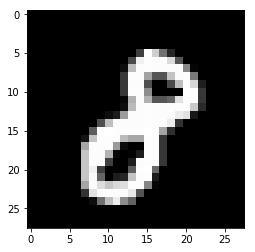

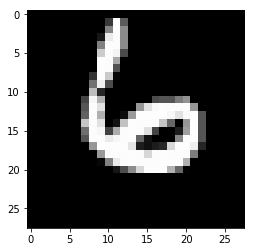

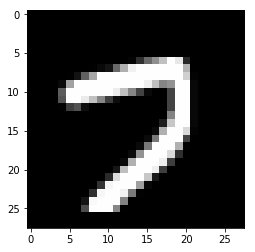

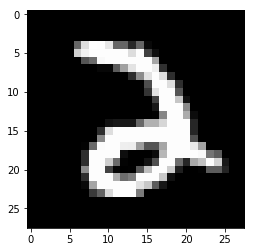

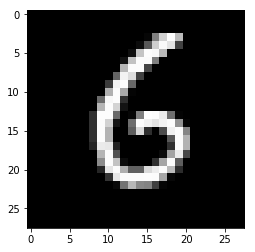

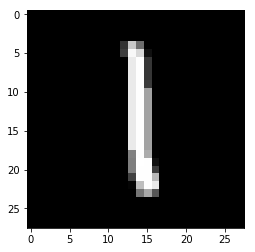

In [11]:
import matplotlib.pyplot as plt
# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
i = 1
for i in range(0,6):
    number = np.random.randint(0,len(X_train))
    plt.imshow(X_train[number], cmap = plt.get_cmap('gray'))
    plt.show()
        
    

In [12]:
# lets store number of rows and no of columns
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1 )
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

# store the shape of a single image
input_shape = (28, 28, 1)

# change our image type to float 32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# normalize our data by changing range from (0 to 255 ) to (0 to 1)
X_train /= 255
X_test /= 255

print('X_train shape',X_train.shape)
print(X_train.shape[0],'X_train samples')
print(X_test.shape[0],'X_test samples')

X_train shape (60000, 28, 28, 1)
60000 X_train samples
10000 X_test samples


### Step 3B - One Hot Encode Our Labels (Y)

In [13]:
from keras.utils import np_utils
# lets do one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

print('total no of classes :' + str(y_train.shape[1]))
num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_classes)


total no of classes :10
10


In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras import backend as k

# create a model
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.001),metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [ ]:
import numpy as np
batch_size = 32
epochs = 5
history = model.fit(X_train,y_train,
                    batch_size = batch_size,
                    epochs = 4,
                    verbose =1,
                    validation_data = (X_test,y_test),verbose = 2)
score = model.evaluate(X_test,y_test,verbose = 0)
                    
                   

In [17]:
print('test loss : ' + str(score[0]))
print('test accuracy :' + str(score[1]))

test loss : 0.03359333070604189
test accuracy :0.9887


### Step 6 - Ploting our Loss and Accuracy Charts

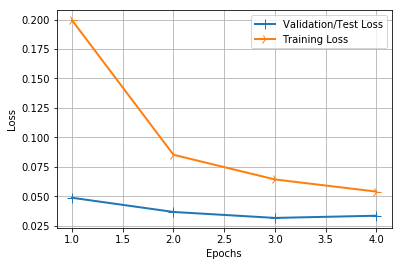

In [18]:
# Plotting our loss charts
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Step 6 - Ploting our Loss and Accuracy Charts

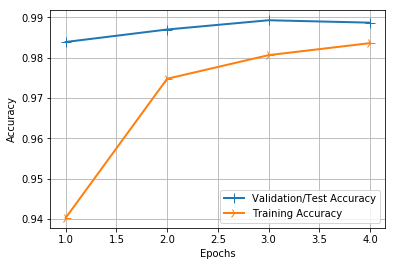

In [19]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [ ]:
model.save("/home/deeplearningcv/DeepLearningCV/Trained Models/8_mnist_simple_cnn_10_Epochs.h5")


In [21]:
import numpy as np
a = np.absolute(2.220000000000004)
print(a)

2.220000000000004


# MNIST CONFUSION MATRIX ANALYSIS

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = model.predict_classes(X_test)
print(classification_report(np.argmax(y_test,axis = 1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis = 1),y_pred))


             precision    recall  f1-score   support

          0       1.00      0.98      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       1.00      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.98      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.98      0.99       974
          9       0.98      0.99      0.98      1009

avg / total       0.99      0.99      0.99     10000

[[ 960    0    4    1    0    3    6    0    1    5]
 [   0 1131    1    0    0    1    2    0    0    0]
 [   0    2 1020    1    0    0    0    8    1    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  969    0    3    0    0   10]
 [   0    0    0    7    0  882    2    0    0    1]
 [   1    2    1    0    1    4  949    0  

In [32]:
import numpy as np
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
result = np.absolute(y_test - y_pred)
print('indices of misclassified data: \n \n' + str(np.nonzero(result > 0)))
len(result)

indices of misclassified data: 
 
(array([ 321,  340,  543,  582,  659,  674,  717,  740,  881,  883,  924,
        947, 1014, 1039, 1112, 1182, 1226, 1232, 1242, 1260, 1319, 1364,
       1393, 1394, 1414, 1530, 1621, 1709, 1737, 1754, 1790, 1808, 1878,
       1901, 1987, 2118, 2130, 2135, 2225, 2293, 2329, 2406, 2454, 2597,
       2654, 2896, 2921, 2939, 2972, 3023, 3062, 3073, 3225, 3251, 3288,
       3289, 3520, 3558, 3599, 3626, 3718, 3726, 3727, 3778, 3780, 3808,
       3941, 4007, 4065, 4176, 4289, 4403, 4497, 4536, 4639, 4740, 4761,
       4783, 4860, 5331, 5450, 5634, 5937, 5955, 6532, 6555, 6572, 6576,
       6597, 6625, 6651, 6783, 7216, 8059, 8094, 8273, 8278, 8325, 8332,
       8408, 8520, 9009, 9015, 9019, 9158, 9634, 9664, 9679, 9692, 9729,
       9839, 9850, 9982], dtype=int64),)


10000

In [35]:
result = [ 321,  340,  543,  582,  659,  674,  717,  740,  881,  883,  924,
        947, 1014, 1039, 1112, 1182, 1226, 1232, 1242, 1260, 1319, 1364,
       1393, 1394, 1414, 1530, 1621, 1709, 1737, 1754, 1790, 1808, 1878,
       1901, 1987, 2118, 2130, 2135, 2225, 2293, 2329, 2406, 2454, 2597,
       2654, 2896, 2921, 2939, 2972, 3023, 3062, 3073, 3225, 3251, 3288,
       3289, 3520, 3558, 3599, 3626, 3718, 3726, 3727, 3778, 3780, 3808,
       3941, 4007, 4065, 4176, 4289, 4403, 4497, 4536, 4639, 4740, 4761,
       4783, 4860, 5331, 5450, 5634, 5937, 5955, 6532, 6555, 6572, 6576,
       6597, 6625, 6651, 6783, 7216, 8059, 8094, 8273, 8278, 8325, 8332,
       8408, 8520, 9009, 9015, 9019, 9158, 9634, 9664, 9679, 9692, 9729,
       9839, 9850, 9982]

In [36]:
len(result)
# 113 samples are misclassified

113

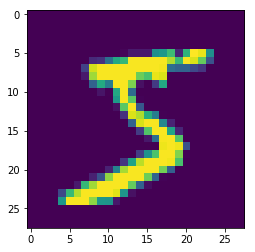

In [24]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#input_image_path = './datasets/catsvsdogs/validation/cats/cat074.jpg'

# Show our input Image for Feature visualization
img1 = x_train[0]
plt.imshow(img1)

#img_size = (x_train[0].shape[0],x_train[0].shape[1])
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
#img1 = image.load_img(img1, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

## Creating a model from an input tensor and list of output tensors

To extract feature maps we create a Keras model that takes batches of images as input and outputs the activations of all convolution and pooling layers. 

In [26]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Run our image through our model's prediction function

In [27]:
activations = activation_model.predict(image_tensor)

In [28]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [33]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 12, 12, 64)


## Visualizing every layer activation

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


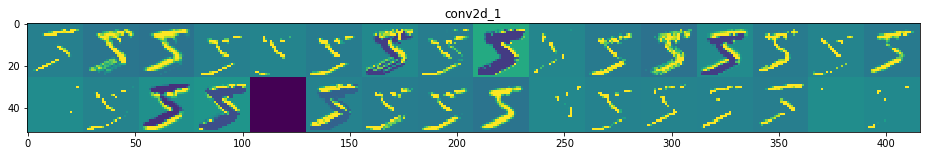

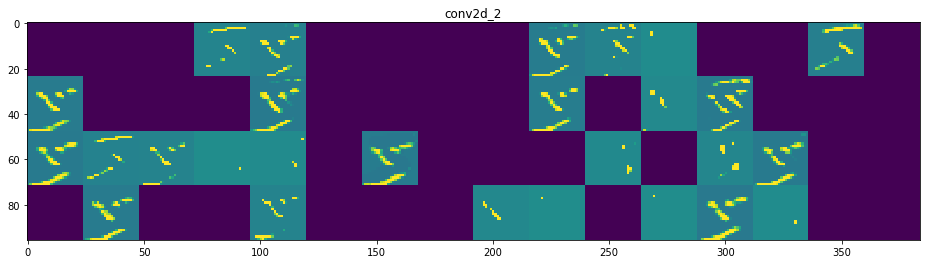

In [34]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Obersavations
   
- You an see that the first layers act mainly as different types of edge detectors and activations retain most of the input image.

- As we go higher up the network to the 2nd and 3rd  layers we can see the activations become more abstract and harder to interpret visually. But you may notice they retain high level visual concepts such as the cata eyes or outline or even cat ears.

- Many blank activations in the later deeper stages, this means that pattern encoded by those filters were not activated by the input image.
